In [2]:
import pandas as pd
df = pd.read_csv(r"Data/adj.csv", low_memory=False)
import networkx as nx
G = nx.DiGraph()
print("Data Shape: ",df.shape)

FG = nx.from_pandas_edgelist(df, source='source', target='target')
#nx.modularity(FG)

Data Shape:  (7027, 5)


In [3]:
FG.number_of_nodes()
FG.number_of_edges()

3532

In [195]:
attr = pd.read_csv(r"Data/Unique interactions.csv")
nx.set_node_attributes(FG, attr.set_index('Protein').to_dict('index'))

In [196]:
dfn = pd.DataFrame(columns=['Nodes','Classification','Pathway Name', 'Function / Role', 'Function (discrete)', 'Gene Expression (not used)', 'Source (Ref)', 'Gene Expression', 'TF (type) (TRRUST)', 'Mutation Count (TCGA)', 'Moderate mutations', 'Low Mutations', 'High Mutations', 'Modifier Mutations', 'degree', 'betweenness', 'eigenvector', 'closeness', 'pagerank', 'corenumber', 'clustering','modularity'])

In [201]:
for n in FG.nodes():
    print(FG.nodes[n])
    dfn.at[n,'Nodes']=str(n)
    dfn.at[n,'Classification']=FG.nodes[n].get('Classification')
    dfn.at[n,'Pathway Name']=FG.nodes[n].get('Pathway Name')
    dfn.at[n,'Function / Role']=FG.nodes[n].get('Function / Role')
    dfn.at[n,'Function (discrete)']=FG.nodes[n].get('Function (discrete)')
    dfn.at[n,'Gene Expression (not used)']=FG.nodes[n].get('Gene Expression (not used)')
    dfn.at[n,'Source (Ref)']=FG.nodes[n].get('Source (Ref)')
    dfn.at[n,'Gene Expression']=FG.nodes[n].get('Gene Expression')
    dfn.at[n,'TF (type) (TRRUST)']=FG.nodes[n].get('TF (type) (TRRUST)')
    dfn.at[n,'Mutation Count (TCGA)']=FG.nodes[n].get('Mutation Count (TCGA)')
    dfn.at[n,'Moderate mutations']=FG.nodes[n].get('Moderate mutations')
    dfn.at[n,'Low Mutations']=FG.nodes[n].get('Low Mutations')
    dfn.at[n,'High Mutations']=FG.nodes[n].get('High Mutations')
    dfn.at[n,'Modifier Mutations']=FG.nodes[n].get('Modifier Mutations')
    dfn.at[n,'degree']=FG.nodes[n].get('degree')
    dfn.at[n,'betweenness']=FG.nodes[n].get('betweenness')
    dfn.at[n,'eigenvector']=FG.nodes[n].get('eigenvector')
    dfn.at[n,'closeness']=FG.nodes[n].get('closeness')
    dfn.at[n,'pagerank']=FG.nodes[n].get('pagerank')
    dfn.at[n,'corenumber']=FG.nodes[n].get('corenumber')
    dfn.at[n,'clustering']=FG.nodes[n].get('clustering')
    dfn.at[n,'modularity']=FG.nodes[n].get('modularity')

{'Classification': 'Oncogene', 'Function (discrete)': 'Transcriptional misregulation, Apoptosis, Proliferation of cells', 'Gene Expression': 'None Found', 'TF (type) (TRRUST)': 'Activation', 'Mutation Count (TCGA)': '3', 'Moderate mutations': '2', 'Low Mutations': '0', 'High Mutations': '0', 'Modifier Mutations': '1', 'TF (regulating same gene) - two hop': nan, 'TF (regulating same gene) - one hop': nan, 'Mutually Exclusively regulating gene (regulating gene) - oncogene': nan, 'Mutually Exclusively regulating gene (regulating gene) - tumorsuppressor': nan, 'Combination gene reguation (regulated by this # genes)': 1, 'Causal Effect (DEGs)': nan, 'degree': 0.0011587485515643105, 'betweenness': 0.0, 'eigenvector': 0.005185117499500467, 'closeness': 0.255855321672102, 'pagerank': 0.000806597476624905, 'corenumber': 1, 'clustering': 0.10372316730662891}
{'Classification': 'Oncogene', 'Function (discrete)': 'Apoptosis, Cell Signaling, Proliferation of cells', 'Gene Expression': '4.843343632'

In [197]:
FG.remove_edges_from(nx.selfloop_edges(FG))

## Centralities

In [198]:
###Centralities

degree_dict = nx.degree_centrality(FG) # Run degree centrality
betweenness_dict = nx.betweenness_centrality(FG) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(FG) # Run eigenvector centrality
closeness_dict = nx.closeness_centrality(FG) # Run closeness centrality
core_number = nx.core_number(FG)
page_rank = nx.pagerank(FG,0.4)
clustering = nx.average_clustering(FG)

# Assign each to an attribute in your network
nx.set_node_attributes(FG, degree_dict, 'degree')
nx.set_node_attributes(FG, betweenness_dict, 'betweenness')
nx.set_node_attributes(FG, eigenvector_dict, 'eigenvector')
nx.set_node_attributes(FG, closeness_dict, 'closeness')
nx.set_node_attributes(FG, page_rank, 'pagerank')
nx.set_node_attributes(FG, core_number, 'corenumber')
nx.set_node_attributes(FG, clustering, 'clustering')

## Mutual Exclusion

In [199]:
df = pd.read_csv(r"Data/Diffusion.csv")
df2 = pd.read_csv(r"Data/Unique interactions.csv") 
df2['Protein'] = df2['Protein'].str.upper()
df['Genes (Node 1)'] = df['Genes (Node 1)'].str.upper()
df['ME oncogene']=""
df['ME TS']=""
df['1-hop Causal']=""
df['2-hop Causal']=""
df['2-hop Cascade']=""

In [200]:
for n in range(0,len(df['Regulating Mutually Exclusively (ones array)'])):
    d=[]
    a = df.at[n,'Regulating Mutually Exclusively (ones array)'].split(",")
    c = df.at[n,'1-hop directly regulating genes'].split(",")
    e=0;f=0
    for m in range(0,len(a)):
        if str(a[m])=='1':
            try:
                if 'oncogene' in str(df2.loc[df2['Protein'] == str(c[m]), 'Classification'].values[0]).lower():
                    e+=1
                elif 'tumor' in str(df2.loc[df2['Protein'] == str(c[m]), 'Classification'].values[0]).lower():
                    f+=1
            except:
                continue
    df.at[n,'ME oncogene']=e
    df.at[n,'ME TS']=f

In [86]:
df.to_csv(r"Data/ME.csv")

In [87]:
df = pd.read_csv(r"Data/ME.csv")

In [202]:
df2 = df2.fillna("None Found")
df2.head()

,Protein,Classification,Function (discrete),Gene Expression,TF (type) (TRRUST),Mutation Count (TCGA),Moderate mutations,Low Mutations,High Mutations,Modifier Mutations,TF (regulating same gene) - two hop,TF (regulating same gene) - one hop,Mutually Exclusively regulating gene (regulating gene) - oncogene,Mutually Exclusively regulating gene (regulating gene) - tumorsuppressor,Combination gene reguation (regulated by this # genes),Causal Effect (DEGs)
0,MYCN,Oncogene,"Transcriptional misregulation, Apoptosis, Prol...",None Found,Activation,3,2,0,0,1,None Found,None Found,None Found,None Found,1,None Found
1,ILF3,Tumorsupressor,"Apoptosis, Proliferation of cells",None Found,Activation,10,4,0,0,6,None Found,None Found,None Found,None Found,1,None Found
2,FOXO3,"Proto-oncogene, Tumorsupressor","Apoptosis, Cell Signaling, Proliferation of cells",None Found,Unknown,3,1,1,0,1,None Found,None Found,None Found,None Found,1,None Found
3,EHMT2,Oncogene,"Apoptosis, Proliferation of cells",None Found,Unknown,2,2,0,0,0,None Found,None Found,None Found,None Found,1,None Found
4,E2F4,TF,Cell Signaling,None Found,Unknown,1,0,0,1,0,None Found,None Found,None Found,None Found,1,None Found


## Diffusion Algorithm v1

In [9]:
for n in range(0,len(df['Genes (Node 1)'])):
    d=[]
    a = df.at[n,'1-hop directly regulating genes'].split(",")
    if 'none found' not in str(df2.loc[df2['Protein'] == str(df.at[n,'Genes (Node 1)']), 'Gene Expression'].values[0]).lower():
        expchanges = "yes"
    else:
        expchanges = "no"
    e=0;f=0;z=0
    for m in range(0,len(a)):
        #print(str(df2.loc[df2['Protein'] == str(a[m]), 'Gene Expression'].values[0]).lower())
        try:
            if 'none found' not in str(df2.loc[df2['Protein'] == str(a[m]), 'Gene Expression'].values[0]).lower():
                e+=1
                x = str(df.loc[df['Genes (Node 1)'] == str(a[m]), '1-hop directly regulating genes'].values[0]).split(",")
                zz=0
                for y in range(0,len(x)):
                    if 'none found' not in str(df2.loc[df2['Protein'] == str(x[y]), 'Gene Expression'].values[0]).lower():
                        zz=1
                if zz==1:
                    z+=1
            b = str(df.loc[df['Genes (Node 1)'] == str(a[m]), '1-hop directly regulating genes'].values[0]).split(",")
            for o in range(0,len(b)):
                if 'none found' not in str(df2.loc[df2['Protein'] == str(b[o]), 'Gene Expression'].values[0]).lower():
                    f+=1
        except:
            continue
    df.at[n,'1-hop Causal']=e
    df.at[n,'2-hop Causal']=f
    df.at[n,'2-hop Cascade']=z

## Diffusion Algo Pseudo Code

In [ ]:
for each gene within the list:
    if gene expression has changed:
        var expchange = "yes"
    else:
        "no"
    a = extract the gene list this *gene* is regulating
    for each gene in a:
        check if exp has changed? if yes:
            e = 1-hop increased by 1
            x = extract the gene list this *1-hop* is regulating
            for each gene this 1-hop is regulating:
                check if exp has changed? if yes:
                    z= 2-hop increase by 1
            calculating the gene score += z/len(x)
    if e>=1:
        calculating final score = avg(gene score)
    else:
        final score = 0

In [14]:
nx.diameter(FG)

6

## Diffusion Algo v2

In [203]:
from statistics import mean
for n in range(0,len(df['Genes (Node 1)'])):
    d=[]
    a = df.at[n,'1-hop directly regulating genes'].split(",")
    lena = len(a)
    e=0;f=[];z=0;l=0;
    for m in range(0,len(a)):
        #print(str(df2.loc[df2['Protein'] == str(a[m]), 'Gene Expression'].values[0]).lower())
        #print(str(a[m]),df2[df2['Protein'] == str(a[m]).upper()])
        if 'none found' not in str(df2.loc[df2['Protein'] == str(a[m]).upper(), 'Gene Expression'].values[0]).lower():
            e+=1;z=0;
            #print(a[m])
            try:
                x = str(df.loc[df['Genes (Node 1)'] == str(a[m]).upper(), '1-hop directly regulating genes'].values[0]).split(",");
            except:
                x=[];
            k=0;
            for y in range(0,len(x)):
                if 'none found' not in str(df2.loc[df2['Protein'] == str(x[y]), 'Gene Expression'].values[0]).lower():
                    z+=1;
                    k=1
            #print(e)
            if x!=[]:
                gene_score = z/len(x);
                f.append(gene_score);
            if k==1:
                l+=1
    #print(e,f,z,len(x))
    #print(df.at[n,'Genes (Node 1)'],e,lena)
    df.at[n,'1-hop Causal']=e
    try:
        df.at[n,'2-hop Cascade']=l
    except:
        df.at[n,'2-hop Cascade']=0
    if f!=[]:
        df.at[n,'2-hop Causal']=mean(f)

In [116]:
df[df['Gene (Node 1)'] == 'CENPU']

46

In [ ]:
for i,n,f in zip(df['Genes (Node 1)'],df['2-hop Cascade'],df['1-hop Causal']):
    print(i,n,f)

## Data Visualization of Bioinformatics & Diffusion Analysis

In [204]:
dfc = df[df['1-hop Causal']!=0]
dfc['% Cascaded']=((dfc['2-hop Cascade']/dfc['1-hop Causal'])*100).astype(int)
dfc.tail(50)

<ipython-input-204-82ea3f375d12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['% Cascaded']=((dfc['2-hop Cascade']/dfc['1-hop Causal'])*100).astype(int)


,Genes (Node 1),1-hop directly regulating (degree centrality),1-hop directly regulating genes,2-hop directly regulating,2-hop directly regulating.1,Regulating Mutually Exclusively (ones array),ME,category,ME oncogene,ME TS,1-hop Causal,2-hop Causal,2-hop Cascade,% Cascaded
257,NGF,1,FOS,74,74,86,0,NaN,0,0,1,0.0945946,1,100
258,NTF3,1,FOS,74,74,86,0,NaN,0,0,1,0.0945946,1,100
259,NTRK2,51,"GIPC1,ADCYAP1R1,CDK5R1,RIT2,RIT1,DYNLT1,DOCK3,...",62,"1,5,3,1,1,51","1,1,2,1,1,1,1,1,1,5,1,1,1,3,2,2,1,1,1,1,1,5,2,...",32,NaN,5,1,3,,0,0
262,STAT1,2,"MMP9,EGR1",147,"81,66","32,106",0,tumorsupressor,0,0,1,0.136364,1,100
264,BCAR1,1,EGR1,66,66,106,0,NaN,0,0,1,0.136364,1,100
265,MYC,4,"ESR1,FOS,PGR,JUNB",205,"72,74,58,1","89,86,34,9",0,"oncogene, cigene",0,0,1,0.0945946,1,100
268,BRCA1,5,"KRT5,ESR1,EGR1,FOS,ID4",318,"54,72,66,74,52","5,89,106,86,6",0,tumorsupressor,0,0,2,0.115479,2,100
270,PTEN,1,EGR1,66,66,106,0,tumorsupressor,0,0,1,0.136364,1,100
271,DLC1,52,"GATA3,TENC1,TNS3,TRAF3IP3,GPM6B,HP,TLN2,SYN3,Z...",57,"3,1,52,1","5,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,...",41,tumorsupressor,4,1,3,,0,0
273,CTNNB1,3,"BIRC5,ESR1,JUN",152,"74,72,6","26,89,33",0,"oncogene, cigene",0,0,1,0.621622,1,100


In [92]:
analysis['2-hop Cascade']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
344    0.0
345    0.0
346    0.0
347    0.0
348    0.0
Name: 2-hop Cascade, Length: 349, dtype: float64

In [208]:
df3.to_csv(r"Data/Analysis.csv")
df3.head()

,Genes (Node 1),1-hop directly regulating (degree centrality),1-hop directly regulating genes,2-hop directly regulating,2-hop directly regulating.1,Regulating Mutually Exclusively (ones array),ME,category,ME oncogene,ME TS,...,Moderate mutations,Low Mutations,High Mutations,Modifier Mutations,TF (regulating same gene) - two hop,TF (regulating same gene) - one hop,Mutually Exclusively regulating gene (regulating gene) - oncogene,Mutually Exclusively regulating gene (regulating gene) - tumorsuppressor,Combination gene reguation (regulated by this # genes),Causal Effect (DEGs)
0,MYCN,1,BIRC5,74,74,26,0,oncogene,0,0,...,2,0,0,1,NaN,NaN,NaN,NaN,1,NaN
1,ILF3,1,BIRC5,74,74,26,0,Tumorsupressor gene,0,0,...,4,0,0,6,NaN,NaN,NaN,NaN,1,NaN
2,FOXO3,1,BIRC5,74,74,26,0,"proto-oncogene, tumorsupressor",0,0,...,1,1,0,1,NaN,NaN,NaN,NaN,1,NaN
3,EHMT2,1,BIRC5,74,74,26,0,oncogene,0,0,...,2,0,0,0,NaN,NaN,NaN,NaN,1,NaN
4,E2F4,1,BIRC5,74,74,26,0,TF,0,0,...,0,0,1,0,NaN,NaN,NaN,NaN,1,NaN


In [207]:
df2 = pd.read_csv(r"Data/Unique interactions.csv")
df3 = pd.merge(df, df2, left_on='Genes (Node 1)',right_on="Protein")

In [15]:
analysis = pd.read_csv(r"Data/Analysis.csv")

In [16]:
from pyvis.network import Network
import networkx as nx

In [ ]:
g = Network(height=800,width=1000,notebook=True)
g.from_nx(FG)

g.show('ex.html')

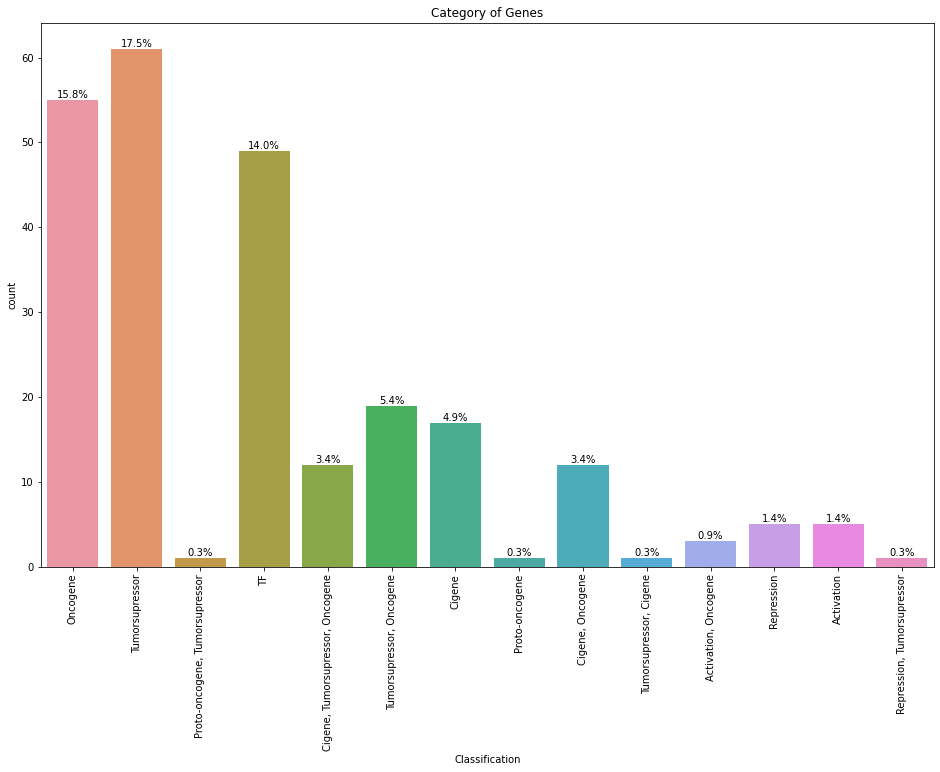

<Figure size 1440x720 with 0 Axes>

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)

ana = analysis[analysis['Classification']!="None Found"]

sns.countplot(x ='Classification', data = ana, ax=ax)
plt.xticks(rotation=90)
plt.title("Category of Genes")
plt.figure(figsize=(20, 10))
ncount = len(analysis)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
 
# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

dff = analysis[analysis['Gene Expression'].notnull()]

fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x ='Genes (Node 1)',y="Gene Expression",data = dff, ax=ax)
plt.xticks(rotation=90)
plt.title("Differential Gene Expression - 21 Underexpressed and 22 Overexpressed")
plt.figure(figsize=(20, 10))
 
# Show the plot
plt.show()

In [100]:
len(dff)-21

22

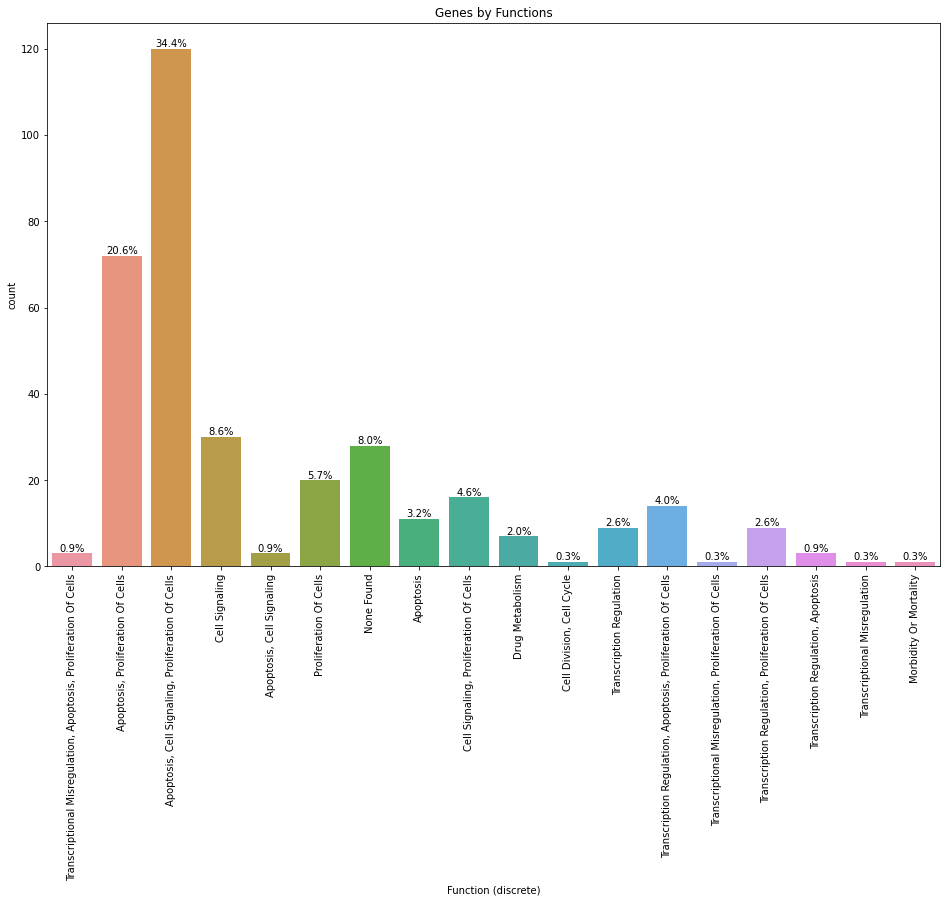

<Figure size 1800x720 with 0 Axes>

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)

analysis['Function (discrete)'] = analysis['Function (discrete)'].str.title()

g = sns.countplot(x ='Function (discrete)', data = analysis, ax=ax)
plt.xticks(rotation=90)
plt.title("Genes by Functions")
plt.figure(figsize=(25, 10))
ncount = len(analysis)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Show the plot
plt.show()

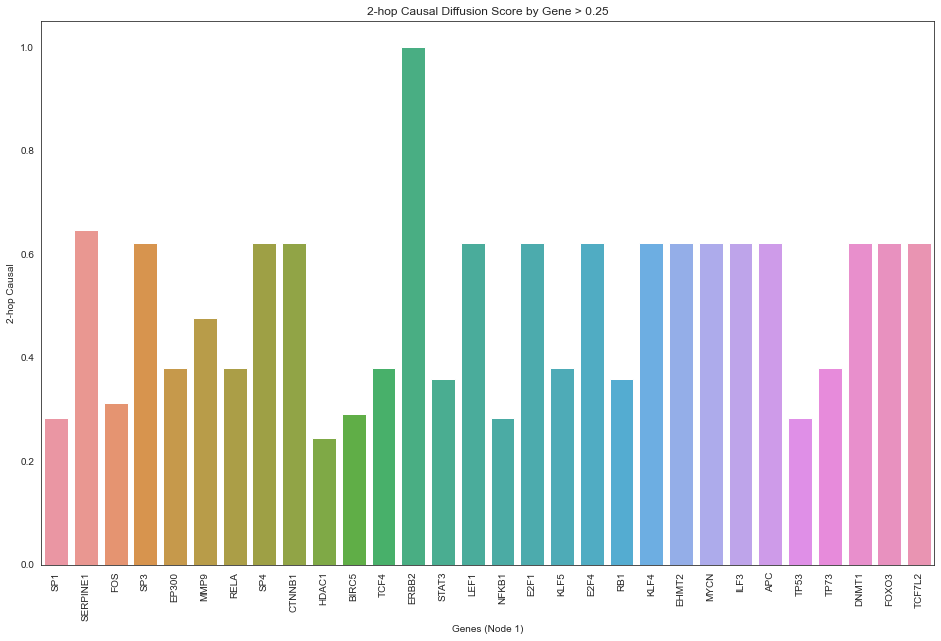

<Figure size 1440x720 with 0 Axes>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
ana = pd.read_csv(r"Data/Analysis V2.csv")
dff = ana[ana['2-hop Causal']>0.24]

fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x ='Genes (Node 1)', y = "2-hop Causal", data = dff)
plt.xticks(rotation=90)
plt.title("2-hop Causal Diffusion Score by Gene > 0.25")
plt.figure(figsize=(20, 10))

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    # set the alignment of the text

# Show the plot
plt.show()

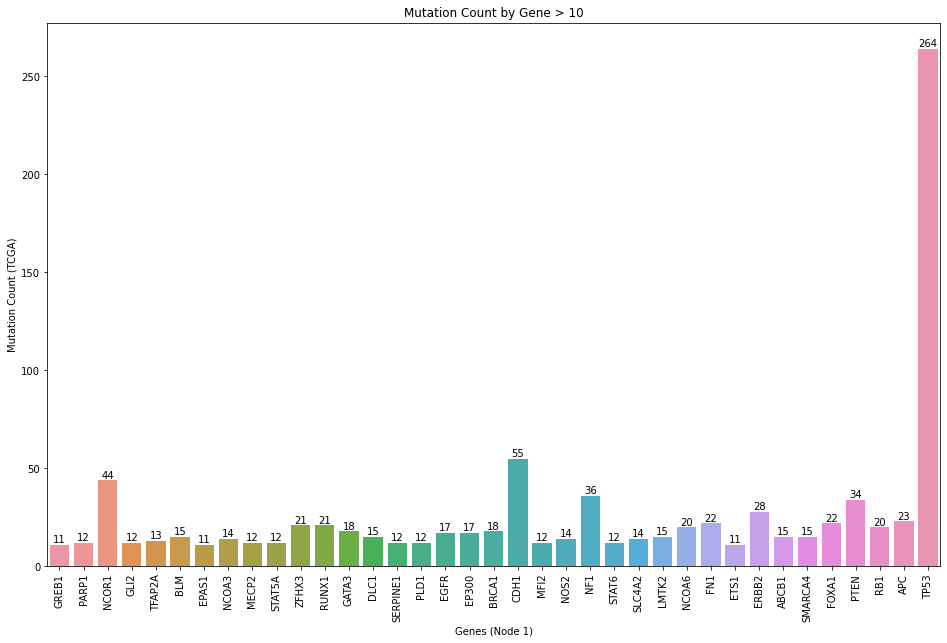

<Figure size 1440x720 with 0 Axes>

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
ana = pd.read_csv(r"Data/Analysis V2.csv")
dff = ana[ana['Mutation Count (TCGA)']>10]

fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x ='Genes (Node 1)', y = "Mutation Count (TCGA)", data = dff)
plt.xticks(rotation=90)
plt.title("Mutation Count by Gene > 10")
plt.figure(figsize=(20, 10))

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(int(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

dff = analysis[analysis['Mutation Count (TCGA)']>10]

fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x ='Genes (Node 1)', y = "Mutation Count (TCGA)", data = dff)
plt.xticks(rotation=90)
plt.title("Mutation Count by Gene > 10")
plt.figure(figsize=(20, 10))

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(int(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Show the plot
plt.show()

In [165]:
cen = pd.read_csv(r"Data/Analysis V3.csv")

350

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dfi = pd.DataFrame(columns=['degree', 'betweenness', 'eigenvector', 'closeness', 'pagerank', 'corenumber', 'clustering'])
dfi['Genes (Node 1)'] = cen['Genes (Node 1)']
dfi['degree'] = cen['degree']
dfi['betweenness'] = cen['betweenness']
dfi['eigenvector'] = cen['eigenvector']
dfi['closeness'] = cen['closeness']
dfi['pagerank'] = cen['pagerank']
dfi['corenumber'] = cen['corenumber']
dfi['clustering'] = cen['clustering']

#dfl = dfi[300:350].reset_index()
l = ['ILF3', 'SRT1', 'LEF1','TNFS10', 'MITF', 'IL10', 'MTF3']
dfl =  dfi

import matplotlib.pyplot as plt

# gca stands for 'get current axis'
ax = plt.gca()

plt.rcParams["figure.figsize"] = (20,5)

dfl.plot(kind='line',x='Genes (Node 1)',y='degree',ax=ax)
dfl.plot(kind='line',x='Genes (Node 1)',y='betweenness', color='red', ax=ax)
dfl.plot(kind='line',x='Genes (Node 1)',y='eigenvector', color='gray', ax=ax)
dfl.plot(kind='line',x='Genes (Node 1)',y='closeness', color='blue', ax=ax)

plt.xticks(('ILF3', 'SRT1', 'LEF1','TNFS10', 'MITF', 'IL10', 'MTF3'))

plt.show()


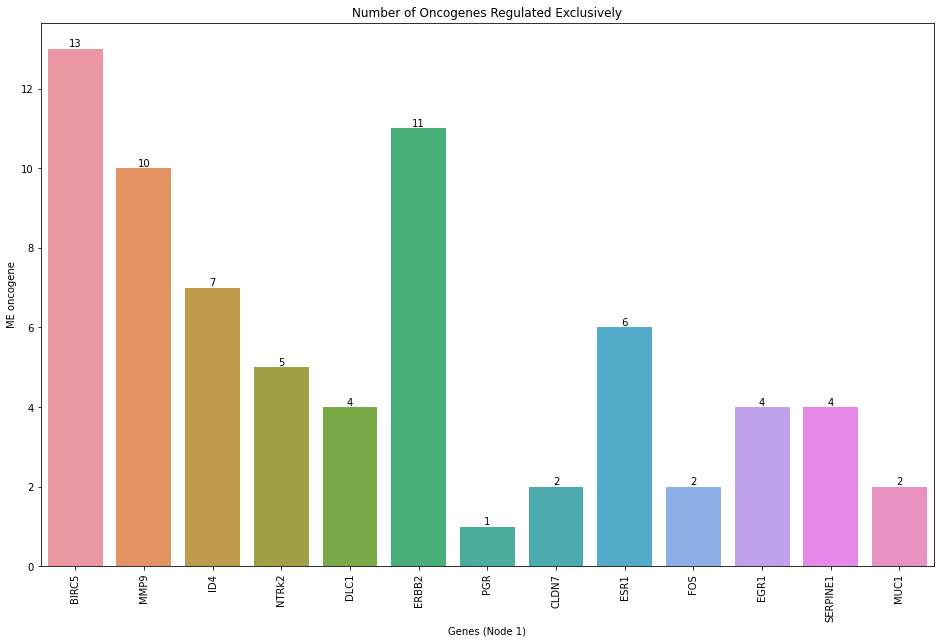

<Figure size 1440x720 with 0 Axes>

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

dff = analysis[analysis['ME oncogene']!=0]

fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x ='Genes (Node 1)', y = "ME oncogene", data = dff)
plt.xticks(rotation=90)
plt.title("Number of Oncogenes Regulated Exclusively")
plt.figure(figsize=(20, 10))

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(int(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Show the plot
plt.show()

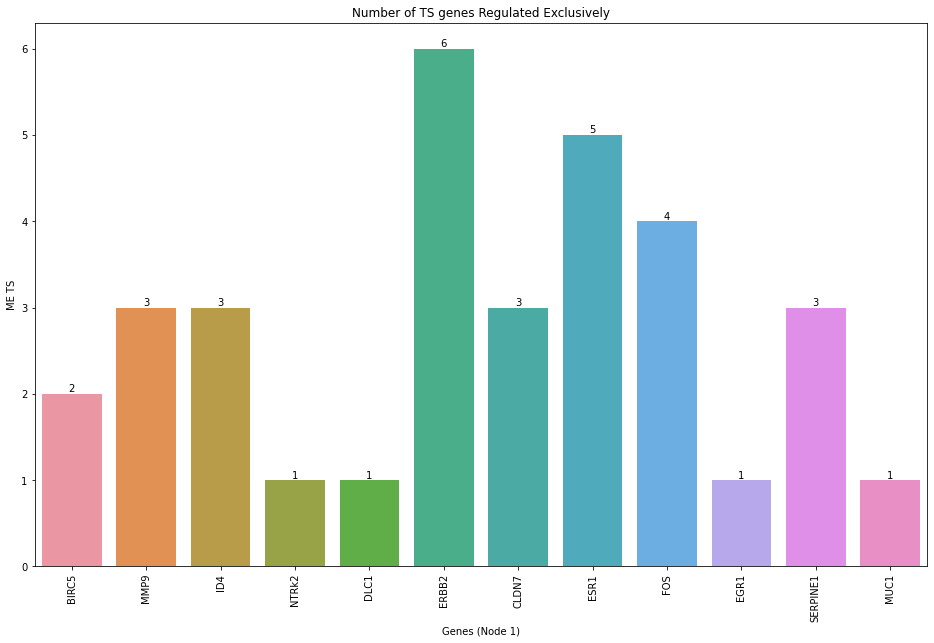

<Figure size 1440x720 with 0 Axes>

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

dff = analysis[analysis['ME TS']!=0]

fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x ='Genes (Node 1)', y = "ME TS", data = dff)
plt.xticks(rotation=90)
plt.title("Number of TS genes Regulated Exclusively")
plt.figure(figsize=(20, 10))

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(int(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Show the plot
plt.show()

In [32]:
dfc[dfc['Genes (Node 1)']=='BIRC5']

,Genes (Node 1),1-hop directly regulating (degree centrality),1-hop directly regulating genes,2-hop directly regulating,2-hop directly regulating.1,Regulating Mutually Exclusively (ones array),ME,category,ME oncogene,ME TS,...,Modifier Mutations,Combination gene reguation (regulated by this # genes),degree,betweenness,eigenvector,closeness,pagerank,corenumber,clustering,% Cascaded
242,BIRC5,74,"TP73,TP53,TCF7L2,TCF4,STAT3,SP4,SP3,SP1,RELA,R...",155,"2,4,1,3,5,2,4,13,6,2,6,1,2,4,2,1,6,1,4,1,1,4,1...","1,5,2,2,5,2,2,10,6,2,4,1,2,4,2,1,6,1,6,1,1,2,1...",56,oncogene,13,2,...,1.0,26,0.001159,0.0,0.014071,0.281842,0.00079,1,0.103723,0


In [25]:
dff['2-hop Causal']

95     69
100    55
170    16
171    53
196    76
206    16
226    19
244    16
247    16
249    47
254    56
268    27
277    20
284    19
296    97
297    72
301    21
304    63
306    81
308    77
309    64
316    50
323    16
324    16
327    35
329    61
Name: 2-hop Causal, dtype: int64

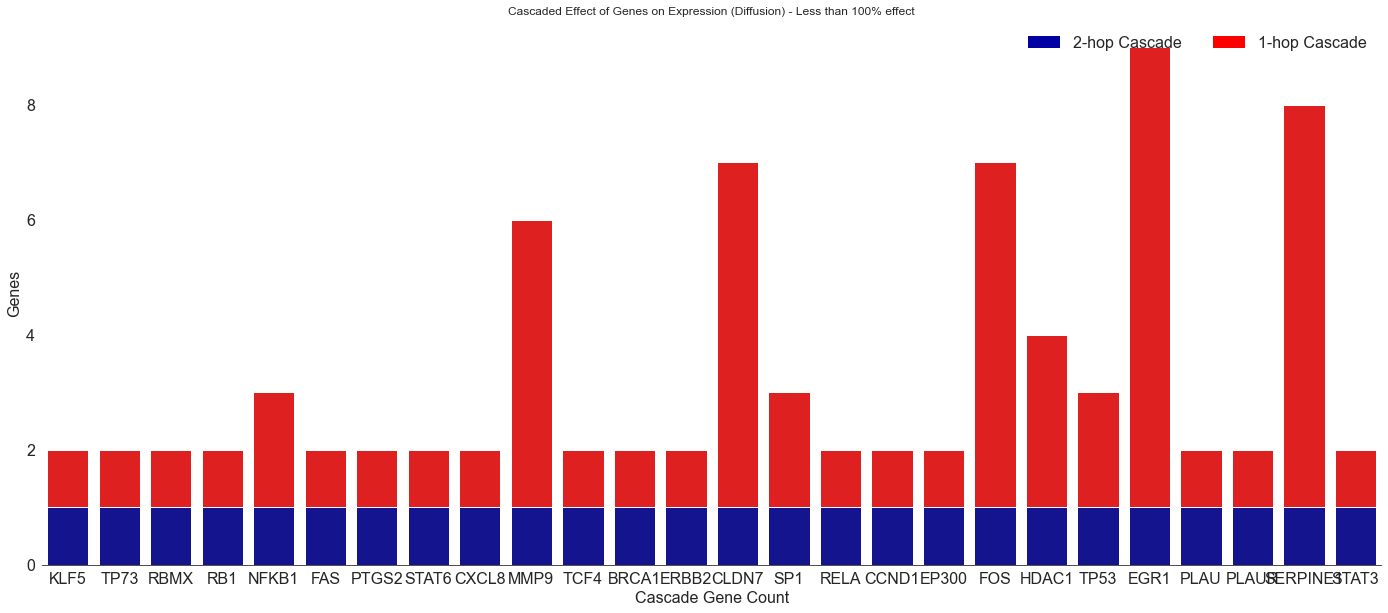

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

dff = dfc[dfc['% Cascaded']!=100]
dff = dff[dff['% Cascaded']!=0]

dfg = pd.DataFrame(columns=["Genes (Node 1)","% Cascaded","1-hop Causal"])

dfg['1-hop Causal']=dff['1-hop Causal']
dfg['Genes (Node 1)']=dff['Genes (Node 1)']
dfg['2-hop Cascade']=dff['2-hop Cascade']


dfg["total"] = dfg['1-hop Causal']

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = dfg['Genes (Node 1)'], y = dfg['1-hop Causal'], color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = dfg['Genes (Node 1)'], y = dfc['2-hop Cascade'], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['2-hop Cascade', '1-hop Cascade'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Genes")
bottom_plot.set_xlabel("Cascade Gene Count")

plt.title("Cascaded Effect of Genes on Expression (Diffusion) - Less than 100% effect")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)
    


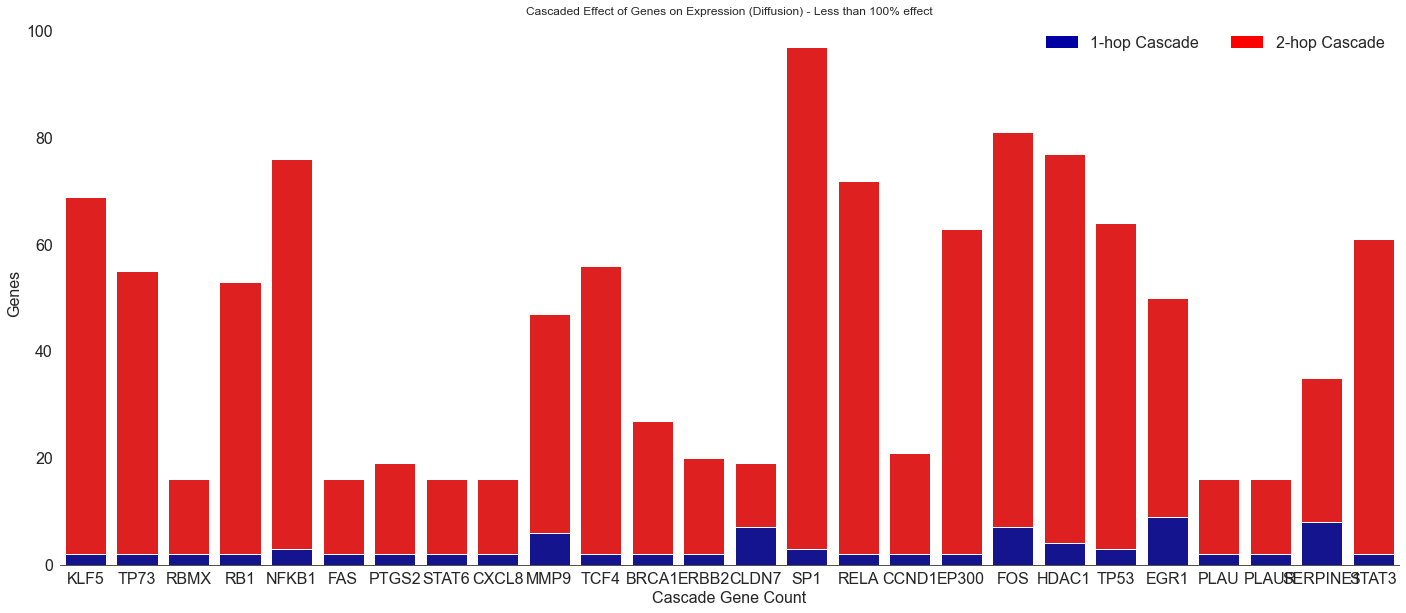

In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

dff = dfc[dfc['% Cascaded']!=100]
dff = dff[dff['% Cascaded']!=0]

dfg = pd.DataFrame(columns=["Genes (Node 1)","% Cascaded","1-hop Causal"])

dfg['1-hop Causal']=dff['1-hop Causal']
dfg['Genes (Node 1)']=dff['Genes (Node 1)']
dfg['2-hop Cascade']=dff['2-hop Causal']


dfg["total"] = dfg['1-hop Causal']

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = dfg['Genes (Node 1)'], y = dfg['2-hop Cascade'], color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = dfg['Genes (Node 1)'], y = dfc['1-hop Causal'], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['1-hop Cascade', '2-hop Cascade'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Genes")
bottom_plot.set_xlabel("Cascade Gene Count")

plt.title("Cascaded Effect of Genes on Expression (Diffusion) - Less than 100% effect")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)
    


No of genes having 100% Cascaded Effect 189


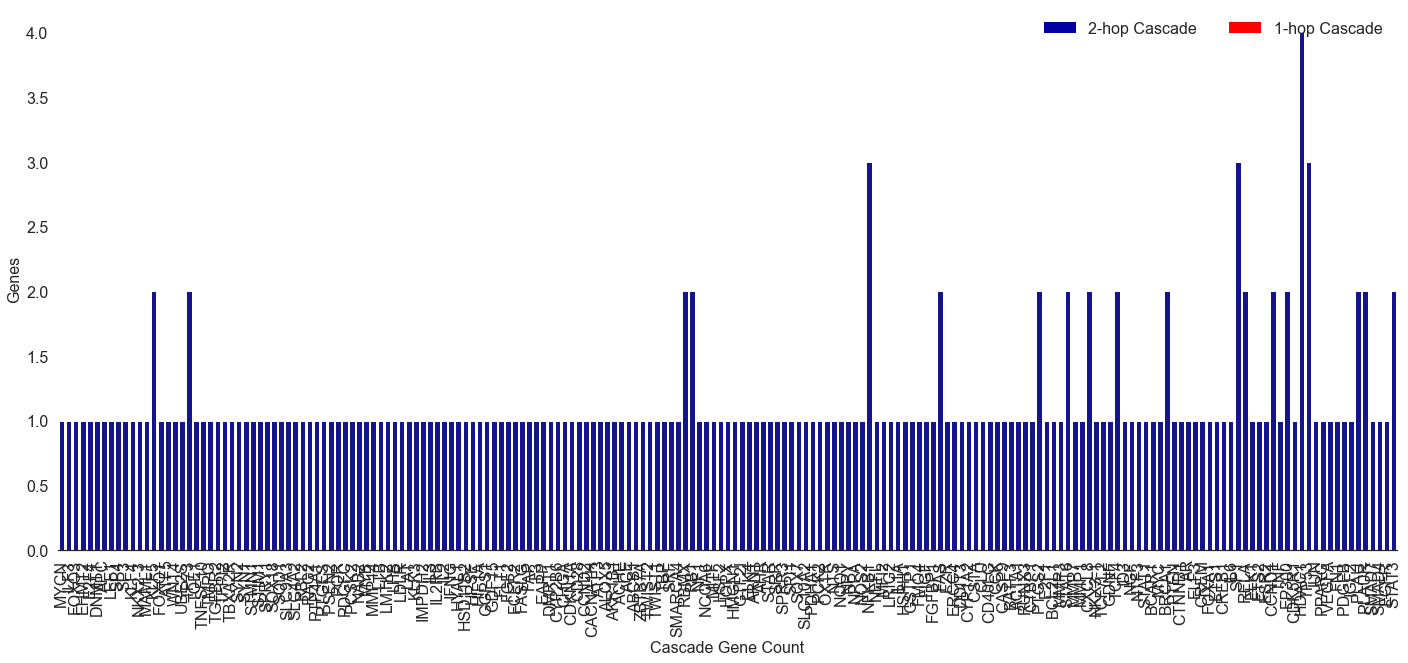

In [219]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

dff = dfc[dfc['% Cascaded']==100]

dfg = pd.DataFrame(columns=["Genes (Node 1)","% Cascaded","1-hop Causal"])

dfg['1-hop Causal']=dff['1-hop Causal']
dfg['Genes (Node 1)']=dff['Genes (Node 1)']
dfg['2-hop Cascade']=dff['2-hop Cascade']


dfg["total"] = dfg['1-hop Causal']

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = dfg['Genes (Node 1)'], y = dfg['1-hop Causal'], color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = dfg['Genes (Node 1)'], y = dfc['2-hop Cascade'], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['2-hop Cascade', '1-hop Cascade'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Genes")
bottom_plot.set_xlabel("Cascade Gene Count")

plt.xticks(rotation=90)

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)
    


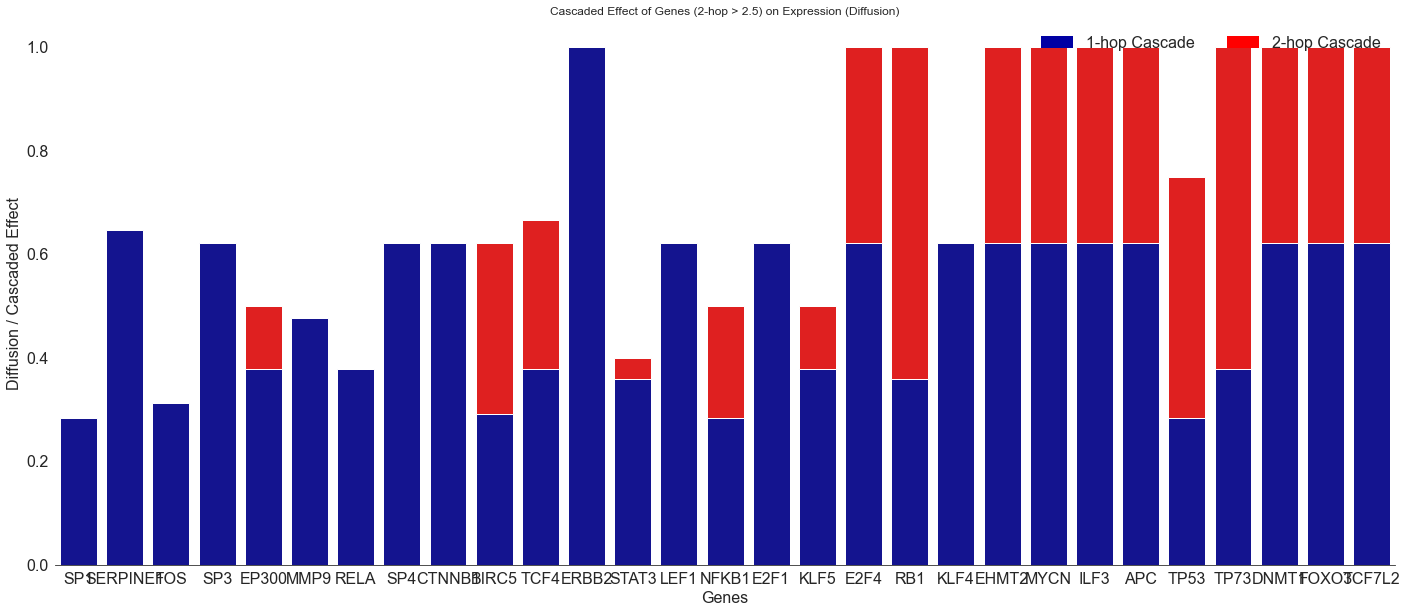

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

ana = pd.read_csv(r"Data/Analysis V2.csv")
#Plot 1 - background - "total" (top) series
ana = ana[ana['2-hop Causal']>0.25]
sns.barplot(x = ana['Genes (Node 1)'], y = ana['1-hop Causal'], color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = ana['Genes (Node 1)'], y = ana['2-hop Causal'], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['1-hop Cascade', '2-hop Cascade'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Diffusion / Cascaded Effect")
bottom_plot.set_xlabel("Genes")

plt.title("Cascaded Effect of Genes (2-hop > 2.5) on Expression (Diffusion)")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)
    


In [6]:
import pandas as pd
attr = pd.read_csv(r"Data/Unique interactions.csv")
ana = pd.read_csv(r"Data/Analysis V2.csv")
df = pd.read_csv(r"Data/TF & PPI interactions.csv", low_memory=False)

In [7]:
a=[]
gene = 'BIRC5'
a.append(gene)
b = ana[ana['Genes (Node 1)']==gene]['1-hop directly regulating genes'].values[0].split(",")
for n in b:
    a.append(n)
dfa = df[df['Node 1'].isin(a)].reset_index()

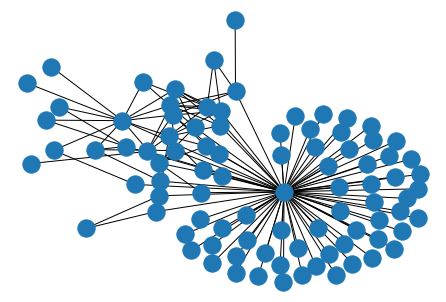

In [8]:
import networkx as nx
G = nx.DiGraph()

NG = nx.from_pandas_edgelist(dfa, source='Node 1', target='Node 2')
NG.remove_edges_from(nx.selfloop_edges(NG))
nx.draw(NG)

In [9]:
from pyvis.network import Network
NG.remove_edges_from(nx.selfloop_edges(NG))
g = Network(height=800,width=1000,notebook=True)
sources = dfa['Node 1']
targets = dfa['Node 2']
ana = attr
ana['Genes (Node 1)'] = attr['Protein']

edge_data = zip(sources, targets)
for src in sources:
    if src == gene:
        g.add_node(src, src, title=src, color='red')
    elif ('oncogene' in ana[ana['Genes (Node 1)']==src]['Classification'].values[0].lower() or 'tumor' in ana[ana['Genes (Node 1)']==src]['Classification'].values[0].lower()) and ana[ana['Genes (Node 1)']==src]['Mutation Count (TCGA)'].values[0].lower() != 'none found' and ana[ana['Genes (Node 1)']==src]['Gene Expression'].values[0].lower() != 'none found':
        g.add_node(src, src, title=src, color='#d29898')
    elif ('oncogene' in ana[ana['Genes (Node 1)']==src]['Classification'].values[0].lower() or 'tumor' in ana[ana['Genes (Node 1)']==src]['Classification'].values[0].lower()) and ana[ana['Genes (Node 1)']==src]['Gene Expression'].values[0].lower() != 'none found':
        g.add_node(src, src, title=src, color='gray')
    elif 'tumor' in ana[ana['Genes (Node 1)']==src]['Classification'].values[0].lower() and 'oncogene' in ana[ana['Genes (Node 1)']==src]['Classification'].values[0].lower():
        g.add_node(src, src, title=src, color='purple')
    elif 'oncogene' in ana[ana['Genes (Node 1)']==src]['Classification'].values[0].lower():
        g.add_node(src, src, title=src, color='yellow')
    elif 'tumor' in ana[ana['Genes (Node 1)']==src]['Classification'].values[0].lower():
        g.add_node(src, src, title=src, color='green')
    elif ana[ana['Genes (Node 1)']==src]['Mutation Count (TCGA)'].values[0].lower() != 'none found' and ana[ana['Genes (Node 1)']==src]['Gene Expression'].values[0].lower() != 'none found':
        g.add_node(src, src, title=src, color='orange')
    elif ana[ana['Genes (Node 1)']==src]['Gene Expression'].values[0].lower() != 'none found':
        g.add_node(src, src, title=src, color='pink')
    elif ana[ana['Genes (Node 1)']==src]['Mutation Count (TCGA)'].values[0].lower() != 'none found':
        g.add_node(src, src, title=src, color='#d2ebeb')
    else:
        g.add_node(src, src, title=src)

for dst in targets:
    if dst == gene:
        g.add_node(dst, dst, title=dst, color='red')
    elif ('oncogene' in ana[ana['Genes (Node 1)']==dst]['Classification'].values[0].lower() or 'tumor' in ana[ana['Genes (Node 1)']==dst]['Classification'].values[0].lower()) and ana[ana['Genes (Node 1)']==dst]['Mutation Count (TCGA)'].values[0].lower() != 'none found' and ana[ana['Genes (Node 1)']==dst]['Gene Expression'].values[0].lower() != 'none found':
        g.add_node(dst, dst, title=dst, color='#d29898')
    elif ('oncogene' in ana[ana['Genes (Node 1)']==dst]['Classification'].values[0].lower() or 'tumor' in ana[ana['Genes (Node 1)']==dst]['Classification'].values[0].lower()) and ana[ana['Genes (Node 1)']==dst]['Gene Expression'].values[0].lower() != 'none found':
        g.add_node(dst, dst, title=dst, color='gray')
    elif 'oncogene' in ana[ana['Genes (Node 1)']==dst]['Classification'].values[0].lower() and 'tumor' in ana[ana['Genes (Node 1)']==dst]['Classification'].values[0].lower():
        g.add_node(dst, dst, title=dst, color='purple')
    elif 'oncogene' in ana[ana['Genes (Node 1)']==dst]['Classification'].values[0].lower():
        g.add_node(dst, dst, title=dst, color='yellow')
    elif 'tumor' in ana[ana['Genes (Node 1)']==dst]['Classification'].values[0].lower():
        g.add_node(dst, dst, title=dst, color='green')
    elif ana[ana['Genes (Node 1)']==dst]['Mutation Count (TCGA)'].values[0].lower() != 'none found' and ana[ana['Genes (Node 1)']==dst]['Gene Expression'].values[0].lower() != 'none found':
        g.add_node(dst, dst, title=dst, color='orange')
    elif ana[ana['Genes (Node 1)']==dst]['Gene Expression'].values[0].lower() != 'none found':
        g.add_node(dst, dst, title=dst, color='pink')
    elif ana[ana['Genes (Node 1)']==dst]['Mutation Count (TCGA)'].values[0].lower() != 'none found':
        g.add_node(dst, dst, title=dst, color='#d2ebeb')
    else:
        g.add_node(dst, dst, title=dst)


for src, dst in edge_data:
    if src != dst:
        g.add_edge(src, dst)

g.show('ex.html')